In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar10

Loading the dataset

In [4]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Normalizing the Images

In [13]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

Randomly Checking an Image

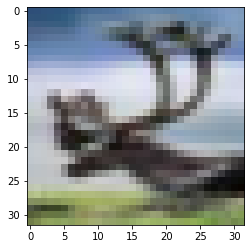

In [14]:
plt.imshow(x_test[40])

Building a Convolutional Neural Network

In [15]:
cifar10_model = tf.keras.models.Sequential(
    [
        # First Layer
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
        # Second Layer
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
        # Max Pooling Layer
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
        # Third Layer
        tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
        # Fourth Layer
        tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
        # Max Pooling Layer
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
        # Flattening Layer
        tf.keras.layers.Flatten(),
        # Droput Layer
        tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None),
        # Adding the first fully connected layer
        tf.keras.layers.Dense(units=128,activation='relu'),
        # Output Layer
        tf.keras.layers.Dense(units=10,activation='softmax')
    ]
)

In [16]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

Compiling the Model

In [17]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

Training the Model

In [ ]:
cifar10_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 270s 172ms/step - loss: 1.3892 - sparse_categorical_accuracy: 0.4979
Epoch 2/15
1563/1563 [==============================] - 266s 170ms/step - loss: 0.9857 - sparse_categorical_accuracy: 0.6510
Epoch 3/15
1563/1563 [==============================] - 274s 175ms/step - loss: 0.8322 - sparse_categorical_accuracy: 0.7058
Epoch 4/15
1563/1563 [==============================] - 278s 178ms/step - loss: 0.7372 - sparse_categorical_accuracy: 0.7409
Epoch 5/15
1563/1563 [==============================] - 278s 178ms/step - loss: 0.6748 - sparse_categorical_accuracy: 0.7624
Epoch 6/15
1563/1563 [==============================] - 281s 180ms/step - loss: 0.6180 - sparse_categorical_accuracy: 0.7819
Epoch 7/15
1563/1563 [==============================] - 284s 182ms/step - loss: 0.5723 - sparse_categorical_accuracy: 0.7976
Epoch 8/15
1563/1563 [==============================] - 281s 180ms/step - loss: 0.5265 - sparse_categorical_accuracy: 0.8135


In [ ]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 15s 47ms/step - loss: 0.6896 - sparse_categorical_accuracy: 0.7835


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7835000157356262
